# TP2 Interpolation Numérique #

## Exercice 1

$$P_n(x)=\sum_{k=0}^{n-1} y_kL_k(x)$$

avec $L_{0}(x)=\displaystyle\frac{(x-x_1)(x-x_2)(x-x_{n-1})}{(x_0-x_1)(x_0-x_2)(x_0-x_{n-1})}$

1) Que renvoie la fonction PR lorsqu'on lui déclare  x=(x(1),x(2),...,x(n))x=(x(1),x(2),...,x(n))  et  y=(y(1),y(2),...,y(n))y=(y(1),y(2),...,y(n))  deux vecteurs de même longueur  nn  et  cc  un nombre réel.

In [101]:
from numpy import prod

def pr(x,y,c):

    S = []

    n = len(x)


    for j in range(n):

        L =[c-xx for xx in x]

        for k in range(n):

            if (k == j):               

                L[k] = 1

            else:

                L[k] = L[k]/(x[j] - x[k])  

        S.append(y[j]*prod(L))


    return  sum(S)

In [102]:
X=[1, 2 ,3, 4];
Y=[-1 ,0, 2 ,1];
for i in X :
    print(pr(X,Y,i))

-1.0
0.0
2.0
1.0


<h3> 2) Que contient le vecteur  LL  après la fin de la boucle  kk . <h3>

In [103]:
x=[1,2,3,4];
y=[-1,0,2,1];

In [104]:
def pr2(x,y,c):
    S = []

    n = len(x)


    for j in range(n):

        L =[c-xx for xx in x]

        for k in range(n):

            if (k == j):               

                L[k] = 1

            else:

                L[k] = L[k]/(x[j] - x[k])  

        S.append(y[j]*prod(L))

    return  L

In [105]:
for i in X:
    L=pr2(x,y,i)
print (L)


[1.0, 1.0, 1.0, 1]


3) Utiliser cette fonction pour dessiner le graph du polynôme de Lagrange  de la fonction $f(x) = \dfrac{1}{1 + x^2}$ aux points $x=[-1:0.1:1]$.

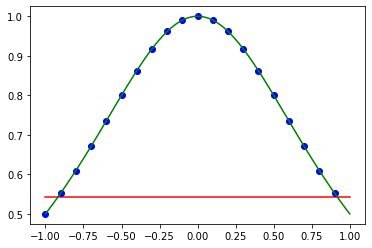

In [140]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(-1,1,0.1)
f= lambda x:1/(1+x**2)
y=f(x)
pt=[]
t=np.linspace(-1,1,100)
for u in range (len(t)):
    pt.append(pr(x,y,t[i])) 
plt.plot(t,pt,"r",x,y,"bo",t,f(t),"g")
plt.show()

4.1) Représenter sur un même graphe la fonction $F$ et $p_n$, où
 $p_n$ est le polynôme d'interpolation de Lagrange de $F$ aux
 points $x_0,\,\ldots,\,x_n$.

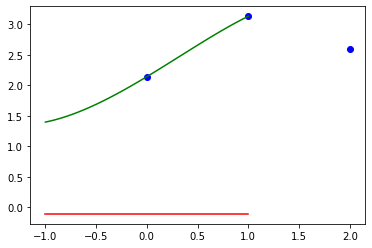

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
x=np.arange(0,3)
f= lambda x:pi-cos(x/2)+x*sqrt(1-(x/2)**2)
f2=np.vectorize(f)
y=f2(x)
ptt=[]
t=np.linspace(-1,1,100)
for u in range (len(t)):
    ptt.append(pr(x,y,t[i])) 
plt.plot(t,ptt,"r",x,y,"bo",t,f2(t),"g")
plt.show()

2)Tracer la courbe d'erreur  (la
 fonction $F-p_n$). Qu'observer vous.

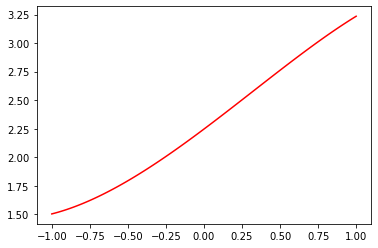

In [160]:
plt.plot(t,f2(t)-pt,"r")
plt.show()

## Exercice 2  ( Phenomène de Runge )

1) Vérifier que sur $[-5,5]$ le polynôme d'interpolation de Lagrange
  de la fonction $f$ définie par $f(x)=\displaystyle{\frac{1}{1+x^2}}$,
en $N$ points uniformément espacés ne convergent pas correctement aux voisinages de $-1$ et $1$, pour $N=7,8,9,10 ...$

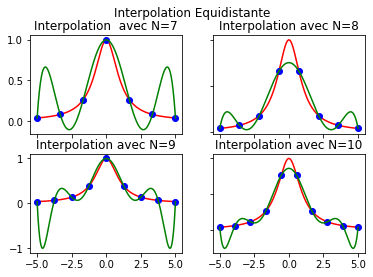

In [195]:
import matplotlib.pyplot as plt
N=7
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1);
t=np.linspace(-5,5,1000);
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Interpolation Equidistante')
ax1.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
ax1.set_title('Interpolation  avec N=7')

N=8
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1);
t=np.linspace(-5,5,1000);

ax2.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
ax2.set_title('Interpolation avec N=8')

N=9
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1);
t=np.linspace(-5,5,1000);

ax3.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
ax3.set_title('Interpolation avec N=9')

N=10
X=np.linspace(-5,5,N)
f= lambda x:1/(1+x**2)
Y=f(X)
p=np.polyfit(X,Y,N-1);
t=np.linspace(-5,5,1000);

ax4.plot(t,f(t),'r',X,Y,'ob', t,np.polyval(p,t),'g')
ax4.set_title('Interpolation avec N=10')
for ax in fig.get_axes():
    ax.label_outer()

2) Les points de Tchebycheff sur un intervalle $[a;b]$ sont définie par :
  $$x_k=\dfrac{a+b}{2}+\dfrac{a-b}{2}\cos\left(\frac{k-1}{n-1}\pi\right)\hspace{0.5cm} (k=1,..,n: x_1=a:x_n=b)$$

  Vérifier que sur $[-5; 5]$ ; l'interpolation polynômiale de $f(x) = \dfrac{1}{1 + x^2}$ ; en $N$ points de Tchebychev
est meilleure qu'une  interpolation utilisant $N$ points uniforment espacés (on prendra $N=10, 11, 16, 17$).

In [206]:
from math import *
def tcheb(a,b,n):
    V=[]
    for k in range(n):
        V[k]=(a+b)/2+(a-b)/2*cos((k-1)/(n-1)*pi)
    return V

In [226]:
tcheb(-5,5,11)


[-4.755282581475767,
 -5.0,
 -4.755282581475767,
 -4.045084971874737,
 -2.938926261462366,
 -1.5450849718747373,
 -3.061616997868383e-16,
 1.5450849718747368,
 2.938926261462365,
 4.045084971874736,
 4.755282581475767]

C:\Users\rahma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\rahma\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


Text(0.5, 1.0, 'Tchebycheff avec N=17')

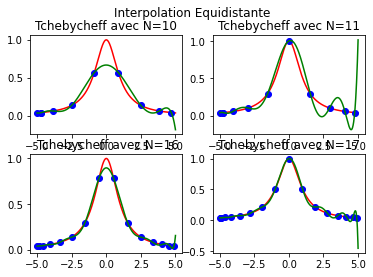

In [252]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
Yt=[]
N=10
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Interpolation Equidistante')
ax1.plot(t,f(t),'r',Xt,Yt,'ob', t,np.polyval(pt,t),'g')
ax1.set_title("Tchebycheff avec N=10")

Yt=[]

N=11
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
ax2.plot(t,f(t),'r',Xt,Yt,'ob', t,np.polyval(pt,t),'g')
ax2.set_title("Tchebycheff avec N=11")
#
Yt=[]
N=16
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
ax3.plot(t,f(t),'r',Xt,Yt,'ob', t,np.polyval(pt,t),'g')
ax3.set_title(" Tchebycheff avec N=16")
#
Yt=[]
N=17
f=lambda x:1/(1+x**2)
Xt=tcheb(-5,5,N)
for i in Xt:
    Yt.append(f(i))
pt=np.polyfit(Xt,Yt,N-1)
ax4.plot(t,f(t),'r',Xt,Yt,'ob', t,np.polyval(pt,t),'g')
ax4.set_title("Tchebycheff avec N=17")

## Exercice 3

On considère les deux programme MATLAB suivant :
``` octave
function f=intN(x,f)% RECURSIVE
m=length(x);
for k=2:m;
    f(k:m)=(f(k:m)-f(k-1:m-1))./(x(k:m)-x(1:m+1-k))
end
``` 
``` octave
function p=intNval(x,c,t)
m=length(x);
p=c(m)*ones(size(t));
for k=m-1:-1:1;
    p=p.*(t-x(k))+c(k);
end
```

1) Déterminer en utilisant les deux codes puis par un calcul à la main le polynôme de Newton pour les données suivantes :


<center>
<table>    
      $\begin{array}{|c|c|c|}
   \hline
   i & x_i  & y_i \\
   \hline
   0 &   -1  &   6 \\
   1 &   0 &  1 \\
   2 &  2  &  3 \\
   3 &  5  &  66 \\
   \hline
\end{array}$  
</table>
</center>

In [271]:
def intN(x,y):
    m=len(x)
    for k in range(m):
        f[k:m]=np.array(np.array(y[k:m])-np.array(np.array(y[k-1:m-1]))/np.array(np.array(x[k:m])-np.array(x[1:m+1-k]))
    
    return f

SyntaxError: invalid syntax (<ipython-input-271-963fd66a8adb>, line 6)

In [268]:
x=[-1,0,2,5]
y=[6,1,3,66]
f=intN(x,y)

ValueError: operands could not be broadcast together with shapes (4,) (0,) 

In [58]:
function p=intNval(x,y,t)
m=length(x);
p=y(m)*ones(size(t));
for k=m-1:-1:1
    p=p.*(t-x(k))+y(k);
end
end

In [59]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
f=intNval(x,y,t)

f =

     7  -118    27   838



In [ ]:
##Calcul a la main

2) Donner le Graph du polynôme trouvé en 1) dans l'intervalle $[-1;5]$.

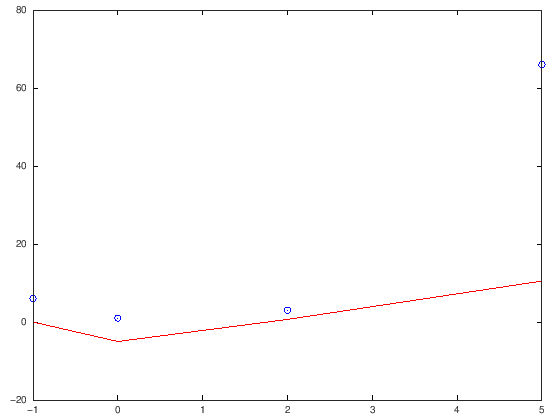

In [65]:
x=[-1,0,2,5];
y=[6,1,3,66];
f=intN(x,y);
plot(x,f,'r',x,y,'ob')

3) Calculer $P(1)$ en utilisant le polynôme trouvé en 1).

In [66]:
x=[-1,0,2,5];
y=[6,1,3,66];
t=[0,1,2,3];
p=intNval(x,y,t);
p(1)

ans =  7


4) Recalculer à la main et puis à l'aide du Programme neville la valeur de $P(1)$.